In [1]:
#
# This needs copied into any new notebook
#
import os
import sys
nb_dir = os.path.split(os.getcwd())[0]
if nb_dir not in sys.path:
    sys.path.append(nb_dir)

In [2]:
#
# Download the nltk data: NEEDS TO BE RUN THE FIRST TIME TO GET DATA LOCAL!!!
#
# Select vader lexicon
#
#

#import nltk
#nltk.download()


In [3]:
from bipolo import db, review, business
import pandas as pd
from sqlalchemy import select, and_

In [4]:
stmt = select([review, business]).where(and_(
    review.c.business_id==business.c.id,
    business.c.state == 'NC',
    business.c.city == 'Charlotte'
))

# Need to do explicit connect in jupyter notebooks (flask automatically sets up connections)
with db.engine.connect() as cnx:
    df = pd.read_sql(stmt.limit(5000), cnx)

In [5]:
df.head()

,id,stars,date,text,useful,funny,cool,business_id,user_id,id,...,neighborhood,address,city,state,postal_code,latitude,longitude,stars,review_count,is_open
0,--akRA7kAt6nPAoqdu71kw,3,2015-01-07,I have heard about this place for nearly as lo...,1,0,0,--cZ6Hhc9F7VkKXxHMVZSQ,Ntq_6n5SpkZGmNHXnEmlNQ,--cZ6Hhc9F7VkKXxHMVZSQ,...,Dilworth,1408 E Blvd,Charlotte,NC,28203,35.1999,-80.8448,4.0,299,1
1,-0xWr8_yPlrdq-8dhcCImw,3,2011-05-20,"The chicken is awesome! Specially, for the pri...",0,0,0,--cZ6Hhc9F7VkKXxHMVZSQ,vh_F9lAQzztdRRu4WQNMiQ,--cZ6Hhc9F7VkKXxHMVZSQ,...,Dilworth,1408 E Blvd,Charlotte,NC,28203,35.1999,-80.8448,4.0,299,1
2,-9mK4d0D5v2QgIA2a2O0sA,5,2011-06-25,There's not a lot to say. The food is amazing....,1,2,0,--cZ6Hhc9F7VkKXxHMVZSQ,jTwhp1FibfINk8L_1RZzXA,--cZ6Hhc9F7VkKXxHMVZSQ,...,Dilworth,1408 E Blvd,Charlotte,NC,28203,35.1999,-80.8448,4.0,299,1
3,-Ud_XVfiL4CAF4fAes4kKg,5,2011-02-16,Delicious rotisserie chicken and sides! One o...,0,0,0,--cZ6Hhc9F7VkKXxHMVZSQ,8q5mg9bWe4A6wWuflL_dOQ,--cZ6Hhc9F7VkKXxHMVZSQ,...,Dilworth,1408 E Blvd,Charlotte,NC,28203,35.1999,-80.8448,4.0,299,1
4,-WmtXztFEDEEuOXWbwqa3g,4,2008-08-24,I am crazy for this place and am going as much...,4,6,4,--cZ6Hhc9F7VkKXxHMVZSQ,TQXtrSpsUyvHMriX8hvNWQ,--cZ6Hhc9F7VkKXxHMVZSQ,...,Dilworth,1408 E Blvd,Charlotte,NC,28203,35.1999,-80.8448,4.0,299,1


In [6]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from nltk import tokenize

sid = SentimentIntensityAnalyzer()
sentiment = df.text.apply(sid.polarity_scores)

D:\Anaconda3\envs\bipolo-dev\lib\site-packages\nltk\twitter\__init__.py:20: UserWarning: The twython library has not been installed. Some functionality from the twitter package will not be available.
  warnings.warn("The twython library has not been installed. "


In [7]:
sent = sentiment.apply(lambda x: pd.Series(x))
stars = df['stars']

sent.head(), stars.head()

(   compound    neg    neu    pos
 0    0.9788  0.039  0.824  0.137
 1    0.9359  0.000  0.627  0.373
 2    0.8779  0.000  0.613  0.387
 3    0.7901  0.000  0.632  0.368
 4    0.9158  0.059  0.719  0.221,    stars  stars
 0      3    4.0
 1      3    4.0
 2      5    4.0
 3      5    4.0
 4      4    4.0)

In [8]:
# Stars is dupped for some reason - need to look into that

# Compare the sentiment to the stars
import seaborn
seaborn.regplot(df['stars'].iloc[:, 0].values, sent['neg'].values, fit_reg=False, x_jitter=.35)

[Text(0,0.5,u'Negative Sentiment'), Text(0.5,0,u'Stars')]

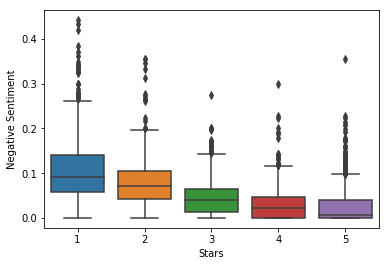

In [9]:
ax = seaborn.boxplot(df['stars'].iloc[:, 0].values, sent['neg'].values )
ax.set(xlabel='Stars', ylabel='Negative Sentiment')

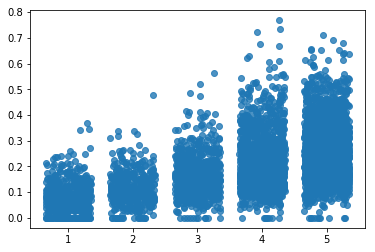

In [10]:
seaborn.regplot(df['stars'].iloc[:, 0].values, sent['pos'].values,  fit_reg=False, x_jitter=.35)

[Text(0,0.5,u'Positive Sentiment'), Text(0.5,0,u'Stars')]

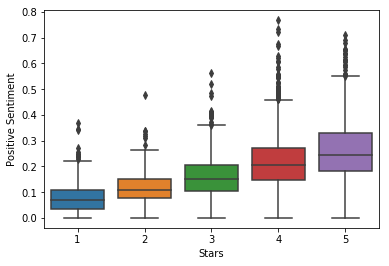

In [11]:
ax = seaborn.boxplot(df['stars'].iloc[:, 0].values, sent['pos'].values )
ax.set(xlabel='Stars', ylabel='Positive Sentiment')

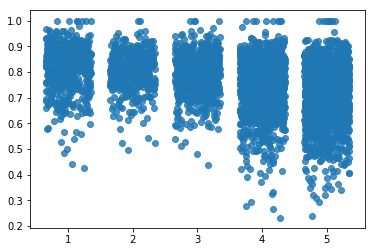

In [12]:
seaborn.regplot(df['stars'].iloc[:, 0].values, sent['neu'].values, x_jitter=.35,  fit_reg=False)

[Text(0,0.5,u'Neutral Sentiment'), Text(0.5,0,u'Stars')]

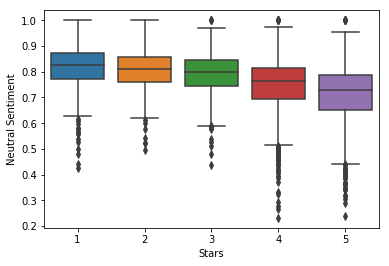

In [13]:
ax = seaborn.boxplot(df['stars'].iloc[:, 0].values, sent['neu'].values )
ax.set(xlabel='Stars', ylabel='Neutral Sentiment')